## 逻辑斯蒂回归分类算法的信用卡欺诈检测(01变量）

#### 1.读取数据，分析数据

In [ ]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
PROJECT_ROOT = Path(os.getcwd()).parent # 获取.ipynb当前目录上1层目录位置
input_file1=PROJECT_ROOT /"data"/"data_creditcard.csv"

In [3]:
data = pd.read_csv(input_file1,encoding='gbk')
data

,时间,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,交易金额,类别
0,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
4,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284793,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284794,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284795,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [4]:
# pd.value_counts:Return a Series containing the frequency of each distinct row in the Dataframe（检查数据均衡）
count_classes = data['类别'].value_counts(sort=True, # Sort by frequencies 
                                       ascending =True,
                                       dropna=True) # 空值不计数
count_classes 

1       492
0    284305
Name: 类别, dtype: int64

Text(0, 0.5, 'Frequency')

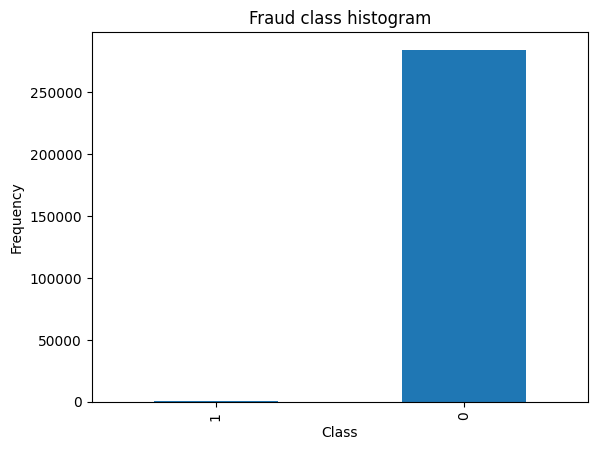

In [5]:
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### 2.数据预处理

##### 2.0 交易金额处理

In [6]:
# 空值
data['交易金额'].isna().sum() 
# 异常值
q1,q3 = np.quantile(data['交易金额'],[0.25,0.75])
iqr = q3 - q1 
mask_high = data['交易金额'] >= q3 + iqr*3
mask_low = data['交易金额'] <= q1 - iqr*3
data = data.loc[~mask_high]
data = data.loc[~mask_low]
data

,时间,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,交易金额,类别
0,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
4,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284793,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284794,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284795,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [7]:
# 移除所有重复值
data.drop_duplicates(inplace = True) 
data

,时间,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,交易金额,类别
0,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
4,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284793,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284794,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284795,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


##### 2.1 标准化数据

In [8]:
# ‘交易金额’列，数据波动大，需要标准化 StandardScaler
from sklearn.preprocessing import StandardScaler
# StandardScaler(‘先学fit后transform’的特征转换） mean：0 divination：1 / 数据泄露 
# 输入要求 array ->values,且二维 -> reshape
data['标准化交易金额'] = StandardScaler().fit_transform(data['交易金额'].values.reshape(-1, 1))

##### 2.2 去掉多余列

In [9]:
# 去掉多余列
# 逻辑斯蒂回归自动识别DF中的“除标签列以外”的其他所有列 as an individual feature(The entire input X is my matrix of features.)
data = data.drop(['时间','交易金额'],axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,类别,标准化交易金额
0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.689883
1,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.667618
2,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.063594
3,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.820260
4,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.689714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,0,-0.659184
284793,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0,-0.346124
284794,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0,0.597441
284795,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,0,-0.706581


#### 3.用下采样方案训练模型

##### 3.1 先划分训练集、测试集，再在训练集里完成下采样

保留异常数据，从正常数据里，随机选取和异常数据相同数量的样本（利用索引操作）np.random.choice

In [10]:
# 取整体数据的特征列、标签列(分类列）
X = data.loc[:, data.columns != '类别'] # 处标签列外，其他特征列均考虑
y = data.loc[:, data.columns == '类别']

from sklearn.model_selection import train_test_split 
# 对原始倾斜数据集进行切分（注意选择相同的随机策略）
# 在 X_train 和 y_train集里面进行下采用，不要污染test集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print("")
print("原始倾斜数据 训练集包含样本数量: ", len(X_train))
print("原始倾斜数据 测试集包含样本数量: ", len(X_test))
print("原始倾斜数据 样本总数: ", len(X_train)+len(X_test))


原始倾斜数据 训练集包含样本数量:  185376
原始倾斜数据 测试集包含样本数量:  79447
原始倾斜数据 样本总数:  264823


In [11]:
# 获取异常值的数量、索引号
rng = np.random.RandomState(42) # 使用 RandomState 对象 为choice设置随机数

number_records_fraud = len(y_train[y_train.类别 == 1])
fraud_indices = np.array(y_train[y_train.类别 == 1].index)

# 从正常样本的索引中随机选择和异常样本数量相同的索引，转为array
normal_indices = y_train[y_train.类别 == 0].index 
random_normal_indices = rng.choice(normal_indices, # What to choose from
                                         size = number_records_fraud, #  returns array of * elements 
                                         replace = False) # 相同数据不可重复被选择random sample    默认是True：same item can be chosen multiple times                                                            
random_normal_indices = np.array(random_normal_indices)

# 将异常样本索引和随机选择的正常样本的索引拼起来，成为下采样样本索引
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
# 根据索引，获取下采样数据集，注意这里一直是原始数据集的索引，需要在原始数据里面检索
under_sample_data = data.iloc[under_sample_indices]

# 切分出下采样样本的特征、标签(二分类列）
X_undersample = under_sample_data.loc[:, under_sample_data.columns != '类别'] # ‘类别’外所有列为特征列（用 loc + Boolean array可定位)
y_undersample = under_sample_data.loc[:, under_sample_data.columns == '类别'] # ‘类别’为标签列

print("下采样样本内，正常样本占比: ", len(under_sample_data[under_sample_data.类别 == 0])/len(under_sample_data))
print("下采样样本内，异常样本占比: ", len(under_sample_data[under_sample_data.类别 == 1])/len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))

IndexError: positional indexers are out-of-bounds

In [ ]:
# 对下采样数据集进行切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 42)
# test_size: 0.3代表测试集占30% ，random_state:always use 随机数生成器种子
print("下采样 训练集包含样本数量: ", len(X_train_undersample))
print("下采样 测试集包含样本数量: ", len(X_test_undersample))
print("下采样策略总体样本数量:", len(X_train_undersample)+len(X_test_undersample))

数据集切分，数据集切分为训练集和测试集 train_test_split

##### 3.2 训练模型

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,recall_score # 混淆矩阵、召回率（评估二分类回归的标准）

逻辑斯蒂回归 LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear') 

```1.模型参数确认 C ：KFold、cross_val_score 交叉验证 / 最优GridSearchCV + KFold ```

The model is trained on K-1 folds and tested on the remaining 1 fold.
This process repeats K times with each fold serving as “the test set” once.

```2.检验该模型的标准：混淆矩阵、召回率```

recall_score = TP/(TP+FN) 预测的召回率（越高越好）：真正异常数据中，有多少被正确预测。
  
“异常未被捕获错误”:FN 被错误分类的负例 ｜ “浪费资源的错误”:FP 被错误分类的正例 

In [ ]:
# 手动循环
def printing_Kfold_scores(x_train_data,y_train_data): 
    fold = KFold(n_splits=5,shuffle=False) # 创建 KFold对象（K折交叉验证 K equal parts） 
    
    # 定义不同的正则强度
    c_param_range = [0.01,0.1,1,10,100]
    
    # 展示结果表 5行2列 每个强度对应召回系数的均值
    results_table = pd.DataFrame(columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    j = 0 #  外层 遍历不同的正则化强度（**j用于全局表格上索引，i是内部索引，不能混，需要区分）
    for c_param in c_param_range: 
        print('-------------------------------------------')
        print('正则化强度: ', c_param)
        print('-------------------------------------------')
        print('')
        
        # 内层 每个fold的召回率
        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data),start=1): 
            # iteration ：i值，第i次交叉验证 ； 
            # kfold.split(x_train_data)是个generator,返回2个索引切片 indices (array positions)，train_index 和 test_index
            # 训练集的索引 indices[0] ，测试集的索引 indices[1] ，利用索引操作比数据本身要好
            
            # C 外层遍历的正则化强度 、L1 正则化、优化算法 liblinear 适合小数据集且L1的情况、random_state(liblinear变）
            # estimator先fit(x，y)学习，y to be a 1D array. 即使1列的df,.values后是2D(n_sample,1),ravel()压成1D；
            # x 不能.values ,转换成array后会丢失features name，但模型需要features name 
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear',random_state=42,max_iter=12000) 
            
            # 训练模型：训练集索引indices[0]，获取训练集数据-自变量、因变量
            lr.fit(x_train_data.iloc[indices[0]],y_train_data.iloc[indices[0]].values.ravel()) 
            # 模型预测：测试集索引 indices[1]，测试集数据-自变量
            y_pred_data = lr.predict(x_train_data.iloc[indices[1]])
            
            # recall_score(y_actural, y_prediction) 需要“相同数据集”的y_actural 和 y_prediction 做参数。
            # 在y_train_data上，用相同索引获得了“测试集数据的真实y值”
            recall_acc = recall_score(y_train_data.iloc[indices[1]], y_pred_data)
            recall_accs.append(recall_acc) # 5个fold放进list,np.mean()即可求平均
            print('Iteration ', iteration,': 召回率= ', recall_acc)
        
        # 执行完所有的交叉验证后，每个参数 c_param 对应的召回率平均值
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率: ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [ ]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample) # 传入下采样训练数据集

In [ ]:
# 绘制混淆矩阵（cm:计算出的混淆矩阵的值，classes：分类标签，cmap:绘图样式
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar() # 灰度条
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

用下采样数据的测试集，测试参数确定后的下采样方案模型

In [ ]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear',random_state=42,max_iter=12000)
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample)

# 计算混淆矩阵（相同测试集上的真实值、预测值） a 1D list, NumPy array, or pandas Series. [0, 1, 1, 0, 1]
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

# 有了混淆矩阵的情况下，计算TP/(FN+TP) 。FN 真实值=1，预测值=0 先y后x
print("测试集中的召回率(下采样）: ",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

上述结果解释：这是理想情况下的模型测试结果，因为下采样数据集中，异常样本：正常样本=1:1，原始数据的实际情况是 28W：500。

用原始数据的测试集，测试“下采样方法”训练出的模型

In [ ]:
y_pred_undersample_model = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred_undersample_model)
np.set_printoptions(precision=2)

print("测试集中的召回率（原始数据）: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

上述结果解释：这是实际情况下的测试，可以看出--下采样数据集上训练处的模型，应用在原始数据量大的数据上，召回率偏差不大。

但实际为正常数据而被预测为异常数据的数据量占比偏高，假阳性变多。FP（误报）。

#### 4.下采样方案训练模型改进

##### 4.1 不采样方案直接训练模型

如果一开始就用倾斜数据进行模型的训练，而不采用改进的“下采样方法”训练模型，结果会怎样。

In [ ]:
best_c = printing_Kfold_scores(X_train,y_train)

通过混淆矩阵来查看原始数据训练模型的测试结果

In [ ]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear',random_state=42,max_iter=12000)
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

上述结果解释：如果使用原始数据训练模型，测试结果-- FP ：假阳性变少，但相对应的召回率较低，很多异常数据没有发现。

##### 4.2 调整下采样方案阈值并训练模型

原先下采样默认阈值0.5，现在指定阈值 ls.predict_proba()，评估下采样方案各阈值下的模型

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear',random_state=42,max_iter=12000) # 下采样数据得到的最优C
lr.fit(X_train_undersample,y_train_undersample.values.ravel())# 用下采样数据训练模型
# 样本归属各类01的概率值 a sample belongs to each class. a 2-dimensional NumPy array  shape(n_samples, n_classes) n_classes二分类=2
# 结果每个样本 [0.89  0.11] 归属类的概率
y_pred_undersample_proba = lr.predict_proba(X_test_undersample) 

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    # 布尔过滤 : 归属为异常值的概率大于该阈值 的数据.
    # 假设i=0.1 ,代表只要样本的异常值概率大于0.1，就会被筛选出标记为 True，true=1 
    # 混淆矩阵时，异常判断过于宽松，很多被算为异常值。recall=1 也就是代表，所有都被算作异常值。
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j) # 3*3子图，J是第几个图，每张图对应一个阈值
    j += 1 # 设置子图起点
    
    # a 1D list, NumPy array, or pandas Series. [0, 1, 1, 0, 1]
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall) # （真实，预测）
    np.set_printoptions(precision=2)

    print(f"阈值={i}时，测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

上述结果解释：

1.随着阈值变大，异常值判断标准提高，检出率下降；2.当阈值为0.1-0.4时，召回率为1，所有人都被预测为正例（异常）没有意义，阈值过于宽松；
2.当阈值为0.5时，误报人数下降，但小比较0.6时，0.6的误报人数下降明显，模型正确检出的负例也有所增加。
3.0.6比0.7，0.6的召回率高（检出异常率高），只是误报的人数相较0.7要高。考虑召回率，优先使用0.6作为阈值，考虑误报人数，优先使用0.7作为阈值；
5.阈值0.8-0.9 召回率低不考虑。

##### 4.3 用新阈值再次预测原始数据

选择阈值是0.6和0.7的下采样模型，使用原始数据的测试集，预测效果

In [ ]:
y_pred_undersample_proba = lr.predict_proba(X_test) 
y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > 0.7
    
cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall) # （真实，预测）
np.set_printoptions(precision=2)

print("测试集中的召回率（原始数据）: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%0.7) 
plt.show()

#### 5 过采样SMOTE方案训练模型

In [ ]:
import pandas as pd 
from imblearn.over_sampling import SMOTE # Imbalanced-Learn 库 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

##### 5.1 建立过采样训练集、测试集

In [ ]:
credit_cards = data
credit_cards.head(5)

读取数据，划分特征和标签

数据集切分

In [ ]:
labels=credit_cards['类别']
features=credit_cards.loc[:,credit_cards.columns != '类别']

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3, 
                                                                            random_state=42)

##### 5.2 SMOTE过采样样本、确定模型最优参数C

在训练集中进行过采样样本 (SMOTE 自动识别少数类，不需要手动）

In [ ]:
oversampler=SMOTE(random_state=42)
os_features,os_labels=oversampler.fit_resample(features_train,labels_train)

print(f"原始训练集类别分布:{pd.Series(labels_train).value_counts()}")
print(f"SMOTE后训练集类别分布:{pd.Series(os_labels).value_counts()}")
print(f"原始数据形状: {features_train.shape}")
print(f"过采样后数据形状: {os_features.shape}")

获取最优参数C的值 best_c

In [ ]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

##### 5.3 训练过采样模型，测试原始数据

In [ ]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear',random_state=42,max_iter=12000)
lr.fit(os_features,os_labels.values.ravel()) # 过采样后数据训练模型

y_pred = lr.predict(features_test) # 原始数据的测试集预测

cnf_matrix = confusion_matrix(labels_test,y_pred) # （原始数据测试集的label真实值 ， 预测值）
np.set_printoptions(precision=2)

print("测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print(f"特征值的系数列表：{lr.coef_}")
print(f"截距项：{lr.intercept_}")